## L'assurance des véhicules 

#### Cissé NIANG : Apprenti Actuaire/Data Scientist

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix  
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD, NMF, KernelPCA
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('/Users/cisseniang/Documents/Data/Données ML/Dataset.xlsx', sheet_name = 'Sheet1')

Nous utiliserons un ensemble de données sur les demandes d'indemnisation au titre de l'assurance automobile personnelle qui comprennent une étiquette de résultat Fraude / Non-fraude. Cet ensemble de données comprend 11 565 sinistres survenus entre janvier 1994 et décembre 1996. Les données comprennent 6 % de sinistres frauduleux et 94 % de sinistres légitimes. Il contient 7 caractéristiques ordinales et 24 caractéristiques catégorielles en plus de la variable de résultat.

## Analyses Exploratoires des Données (EDA)

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [4]:
df['Year'].unique()

array([1994, 1995, 1996])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [6]:
df.Make.value_counts()

Pontiac      2899
Toyota       2317
Honda        2159
Mazda        1724
Chevrolet    1253
Accura        354
Ford          338
VW            220
Dodge          77
Saab           70
Mercury        68
Saturn         41
Nisson         22
BMW             9
Jaguar          5
Porche          3
Mecedes         3
Ferrari         2
Lexus           1
Name: Make, dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending = False)

DriverRating            6
Age                     5
PoliceReportFiled       0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
Month                   0
Deductible              0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
WitnessPresent          0
RepNumber               0
WeekOfMonth             0
PolicyNumber            0
FraudFound_P            0
VehiclePrice            0
VehicleCategory         0
PolicyType              0
Fault                   0
MaritalStatus           0
Sex                     0
WeekOfMonthClaimed      0
MonthClaimed            0
DayOfWeekClaimed        0
AccidentArea            0
Make                    0
DayOfWeek               0
ClaimSize               0
dtype: int64

In [8]:
df.FraudFound_P.value_counts()/df.shape[0]*100

0    94.076956
1     5.923044
Name: FraudFound_P, dtype: float64

In [9]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [10]:
df.nunique().sort_values(ascending = False)

PolicyNumber            11565
ClaimSize                3332
Age                        66
Make                       19
RepNumber                  16
MonthClaimed               13
Month                      12
PolicyType                  9
AgeOfPolicyHolder           9
AgeOfVehicle                8
DayOfWeekClaimed            8
DayOfWeek                   7
VehiclePrice                6
NumberOfCars                5
AddressChange_Claim         5
WeekOfMonth                 5
WeekOfMonthClaimed          5
Days_Policy_Accident        5
PastNumberOfClaims          4
Days_Policy_Claim           4
NumberOfSuppliments         4
DriverRating                4
MaritalStatus               4
Deductible                  4
VehicleCategory             3
Year                        3
BasePolicy                  3
AccidentArea                2
Sex                         2
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
FraudFound_P                2
Fault     

In [11]:
df.groupby("Make").FraudFound_P.agg(["count","mean"]).sort_values(by = "count", ascending = False)

,count,mean
Make,,
Pontiac,2899,0.051742
Toyota,2317,0.060855
Honda,2159,0.062066
Mazda,1724,0.052784
Chevrolet,1253,0.059856
Accura,354,0.127119
Ford,338,0.073964
VW,220,0.027273
Dodge,77,0.025974


In [12]:
df.groupby("PolicyType").FraudFound_P.agg(["count","mean"]).sort_values(by = "count", ascending = False)

,count,mean
PolicyType,,
Sedan - Collision,4186,0.067129
Sedan - Liability,3742,0.007215
Sedan - All Perils,3067,0.100098
Sport - Collision,262,0.129771
Utility - All Perils,251,0.131474
Utility - Collision,24,0.125000
Sport - All Perils,19,0.000000
Utility - Liability,13,0.000000
Sport - Liability,1,0.000000


Il y a 4186 polices de type "Sedan-Collision" , et la moyenne de la variable "FraudFound_P" est d'environ 0.067. Cela signifie qu'en moyenne, environ 6,7% des polices de ce type sont associées à une réclamation de fraude.

Il y a 3067 polices de type "Sedan - All Perils", et la moyenne de "FraudFound_P" est d'environ 0.1, indiquant une probabilité moyenne de fraude plus élevée par rapport à d'autres catégories.

Il y a 262 polices de type "Sport - Collision", et la moyenne de "FraudFound_P" est d'environ 0.13, suggérant une probabilité moyenne de fraude relativement élevée pour ce type de police.

Il y a 251 polices de type "Utility - All Perils", et la moyenne de "FraudFound_P" est d'environ 0.131, ce qui est similaire à la catégorie "Sport - Collision".

In [13]:
df.groupby(["PoliceReportFiled", "WitnessPresent"]).FraudFound_P.agg(["count","mean"])

count      mean
PoliceReportFiled WitnessPresent                 
No                No              11193  0.059859
                  Yes                42  0.047619
Yes               No                304  0.042763
                  Yes                26  0.000000

Pour les réclamations où "PoliceReportFiled" (Si un rapport de police a été déposé au moment de l'accident) est "No" et "WitnessPresent" (Si des témoins étaient présents au moment de l'accident) est "No", il y a un total de 11 193 réclamations. La moyenne de la probabilité de fraude pour cette catégorie est d'environ 0,0599.

Pour les réclamations où "PoliceReportFiled" est "Yes" et "WitnessPresent" est "Yes", il y a un total de 42 réclamations. La moyenne pour cette catégorie est d'environ 0,0476.

Pour les réclamations où "PoliceReportFiled" est "Yes" et "WitnessPresent" est "No", il y a un total de 304 réclamations. La moyenne pour cette catégorie est d'environ 0,0428.

Pour les réclamations où "PoliceReportFiled" est "Yes" et "WitnessPresent" est "26" (il semblerait y avoir une erreur de données ici, car "26" semble être une valeur numérique plutôt qu'une catégorie), il y a un total de réclamations. La moyenne pour cette catégorie est de 0,0. Cela pourrait indiquer que dans ces cas, il n'y a pas eu de réclamation de fraude.


<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

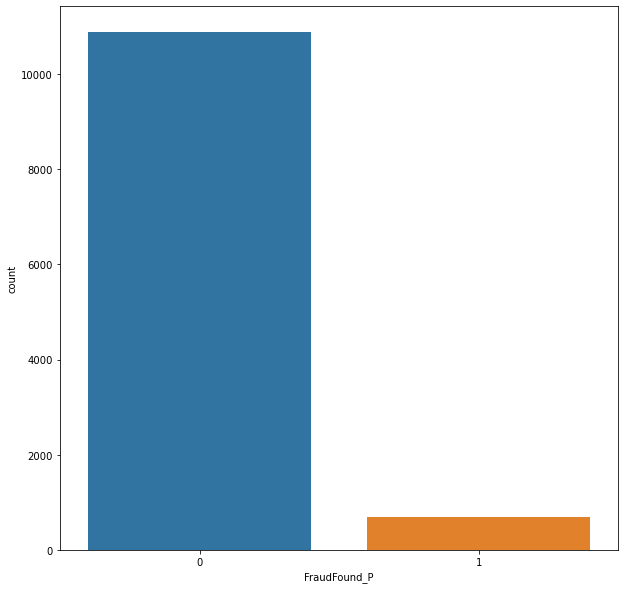

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='FraudFound_P',data=df)

On constate d'après ce graphique un problème de déséquilibre de classe

Cela peut entraîner des modèles biaisés qui donnent de mauvaises performances, car ils ont tendance à prédire la classe majoritaire, négligeant la classe minoritaire.

Pour remédier à ce problème, nous allons utiliser des techniques de re-échantillonage telles (over-sampling (pour la classe minoritaire), under-sampling (pour la classe majoritaire) etc. ) ou utilisez des métriques d'évaluation appropriées pour les classes déséquilibrées, telles que l'aire sous la courbe ROC (AUC-ROC), l'AUC-PR (aire sous la courbe précision-rappel) et la F1-score

<AxesSubplot:ylabel='None'>

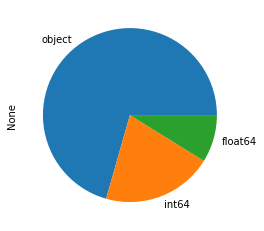

In [15]:
import numpy as np
df.dtypes.value_counts().plot.pie()

In [16]:
#df['Age'] = df['Age'].astype(int)

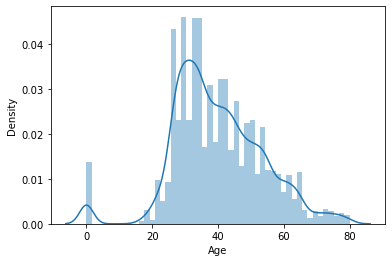

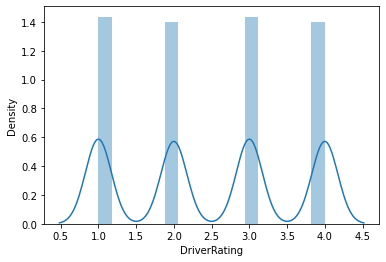

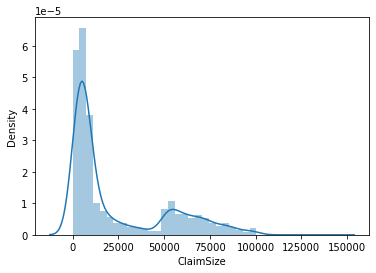

In [17]:
for i in df.select_dtypes(float):
    plt.figure()
    sns.distplot(df[i])
    #print(i)

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['DriverRating'] = df['DriverRating'].fillna(df['DriverRating'].mode()[0])

In [19]:
df.isnull().any().sum()

0

## Préparation des données

In [20]:
df['VehiclePrice'].unique().tolist()

['more than 69000',
 '20000 to 29000',
 '30000 to 39000',
 'less than 20000',
 '40000 to 59000',
 '60000 to 69000']

In [21]:
#df['DriverRating'].unique().tolist()

In [22]:
#df['Age'].unique().tolist()

In [23]:
df_object = df.select_dtypes(include=['object'])
#df_object

In [24]:
df_object.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Feb,Saturday,Honda,Urban,Monday,Feb,Male,Married,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,Collision


In [25]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Mar', 'Aug', 'Apr', 'Jul',
       'May', 'Sep', 'Nov'], dtype=object)

In [26]:
df_object['Month'].replace({'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7,'Sep':8,
                    'Oct':9, 'Nov':10, 'Dec':11}, inplace = True)
df_object['MonthClaimed'].replace({'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7,'Sep':8,
                    'Oct':9, 'Nov':10, 'Dec':11}, inplace = True)

In [27]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [28]:
df_object['DayOfWeek'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}, inplace = True)
df_object['DayOfWeekClaimed'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}, inplace = True)

In [29]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [30]:
df_object['VehiclePrice'].replace({
    'less than 20000': 1,
    '20000 to 29000' : 2,
    '30000 to 39000' : 3,
    '40000 to 59000' : 4,
    '60000 to 69000' : 5,
    'more than 69000': 6,
          },inplace=True)

In [31]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', 'new', '5 years',
       '4 years', '2 years'], dtype=object)

In [32]:
df_object['AgeOfVehicle'].replace({
    'new'         : 1,
    '2 years'     : 2,
    '3 years'     : 3,
    '4 years'     : 4,
    '5 years'     : 5,
    '6 years'     : 6,
    '7 years'     : 7,
    'more than 7' : 8,
          },inplace=True)

In [33]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '36 to 40',
       'over 65', '16 to 17', '18 to 20', '21 to 25'], dtype=object)

In [34]:
df_object['AgeOfPolicyHolder'].replace({
    '16 to 17'     : 1,
    '18 to 20'     : 2,
    '21 to 25'     : 3,
    '26 to 30'     : 4,
    '31 to 35'     : 5,
    '36 to 40'     : 6,
    '41 to 50'     : 7,
    '51 to 65'     : 8,
    'over 65'      : 9,
          },inplace = True)

In [35]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Mazda', 'Ford', 'Chevrolet', 'Pontiac',
       'Dodge', 'Accura', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [36]:
df_object['Days_Policy_Accident'].replace({'more than 30':4, '15 to 30':3, 'none':0, '1 to 7':1, '8 to 15':2},inplace = True)

In [37]:
df_object['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [38]:
df_object['Days_Policy_Claim'].replace({'more than 30':3, '15 to 30':2, 'none':0,'8 to 15':1},inplace = True)

In [39]:
df_object['BasePolicy'].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [40]:
df_object.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,11,2,Honda,Urban,1,0,Female,Single,Policy Holder,Sport - Liability,Sport,6,4,3,none,3,4,No,No,External,none,1 year,3 to 4,Liability
1,0,2,Honda,Urban,0,0,Male,Single,Policy Holder,Sport - Collision,Sport,6,4,3,none,6,5,Yes,No,External,none,no change,1 vehicle,Collision
2,9,4,Honda,Urban,3,10,Male,Married,Policy Holder,Sport - Collision,Sport,6,4,3,1,7,7,No,No,External,none,no change,1 vehicle,Collision
3,5,5,Toyota,Rural,4,6,Male,Married,Third Party,Sedan - Liability,Sport,2,4,3,1,8,8,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,1,5,Honda,Urban,0,1,Male,Married,Third Party,Sport - Collision,Sport,6,4,3,1,7,6,No,No,External,1 to 2,no change,1 vehicle,Collision


In [41]:
df_object.select_dtypes(include=['object'])

,Make,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,PastNumberOfClaims,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Urban,Female,Single,Policy Holder,Sport - Liability,Sport,none,No,No,External,none,1 year,3 to 4,Liability
1,Honda,Urban,Male,Single,Policy Holder,Sport - Collision,Sport,none,Yes,No,External,none,no change,1 vehicle,Collision
2,Honda,Urban,Male,Married,Policy Holder,Sport - Collision,Sport,1,No,No,External,none,no change,1 vehicle,Collision
3,Toyota,Rural,Male,Married,Third Party,Sedan - Liability,Sport,1,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Honda,Urban,Male,Married,Third Party,Sport - Collision,Sport,1,No,No,External,1 to 2,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,Mazda,Urban,Male,Married,Policy Holder,Sedan - Liability,Sport,1,Yes,No,External,1 to 2,no change,1 vehicle,Liability
11561,Chevrolet,Urban,Male,Single,Third Party,Sedan - Collision,Sedan,none,No,No,External,1 to 2,4 to 8 years,2 vehicles,Collision
11562,Toyota,Urban,Male,Married,Policy Holder,Sedan - Collision,Sedan,2 to 4,No,No,External,none,no change,1 vehicle,Collision
11563,Toyota,Urban,Female,Married,Third Party,Sedan - All Perils,Sedan,none,No,No,External,more than 5,no change,1 vehicle,All Perils


In [42]:
df1 = df_object.select_dtypes(include=['object'])

In [43]:
df1.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'PastNumberOfClaims', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [44]:
df_num = df.select_dtypes(include = ['int','float'])
#df_num

In [45]:
import pandas as pd

def encode_categorical_variables(df_object, columns_to_encode):

    """
    Encode les variables catégorielles avec plusieurs modalités en utilisant l'encodage one-hot (binaire).

    Args:
        df (DataFrame): Le DataFrame contenant les données.
        columns_to_encode (list): Liste des noms des colonnes catégorielles à encoder.

    Returns:
        DataFrame: Le DataFrame avec les colonnes catégorielles encodées en one-hot.
    """
    # Copiez le DataFrame original pour éviter les modifications involontaires
    df_encoded = df_object.copy()

    # Utilisez pd.get_dummies pour encoder les colonnes spécifiées
    df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode, drop_first = True)

    return df_encoded



In [46]:


columns_to_encode = (['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
                      'VehicleCategory', 'PastNumberOfClaims', 'PoliceReportFiled',
                      'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
                      'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'])
df_encoded = encode_categorical_variables(df_object, columns_to_encode)

# Maintenant, 'df_encoded' contient les colonnes catégorielles encodées en one-hot



In [47]:
df_encoded

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,AgeOfPolicyHolder,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,11,2,1,0,6,4,3,3,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0,2,0,0,6,4,3,6,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,9,4,3,10,6,4,3,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,5,5,4,6,2,4,3,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,5,0,1,6,4,3,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,10,3,0,10,2,4,3,7,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
11561,10,4,0,10,3,4,3,7,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
11562,10,4,1,10,2,4,3,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
11563,11,0,3,11,2,4,3,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [48]:
data = pd.concat([df_num, df_encoded], axis=1)
data.shape

(11565, 72)

In [49]:
data.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,AgeOfPolicyHolder,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21.0,0,1,12,300,1.0,1994,55526.069421,11,2,1,0,6,4,3,3,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,3,4,34.0,0,2,15,400,4.0,1994,59294.455571,0,2,0,0,6,4,3,6,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,5,2,47.0,0,3,7,400,3.0,1994,71756.941320,9,4,3,10,6,4,3,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,2,1,65.0,0,4,4,400,2.0,1994,7584.153493,5,5,4,6,2,4,3,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,3,36.0,0,7,14,400,1.0,1994,98545.374339,1,5,0,1,6,4,3,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


Comme sus-mentionné, on est confrontés à un problème de déséquilibres de classe, nous allons utilisons la méthode de re-échantillonnge pour règler ce problème. 

## Split

In [50]:
X = data.drop(['FraudFound_P','PolicyNumber'],axis = 1)
Y = data['FraudFound_P']

In [51]:
X.shape, Y.shape

((11565, 70), (11565,))

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state = 42, stratify = Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.4,
                                                random_state = 42, stratify = Y_test)
X_train.shape, X_test.shape, X.shape , X_val.shape, Y_val.shape

((8095, 70), (1388, 70), (11565, 70), (2082, 70), (2082,))

#### Nous allons dans un premier temps essayer de faire la modélisation sur les données déséquilibrées 

In [53]:

############################################################

print('Logistic Regression')

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

X_train_predict_1 = model_lr.predict(X_train)
train_data_accur_1 = accuracy_score(X_train_predict_1, Y_train)
print("La précision des données d'entrainement: ",train_data_accur_1)

X_test_predict_1 = model_lr.predict(X_test)
test_data_accur_1 = accuracy_score(X_test_predict_1, Y_test )
print('La précision des données de test: ',test_data_accur_1)


print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_lr = model_lr.predict(X)
accuracy_lr = accuracy_score(prediction_lr, Y )
print("La précision de l'ensemble des données est de: ",accuracy_lr)

print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Random Forest Classifier')


model_rf = RandomForestClassifier(criterion = 'gini', n_estimators = 150 ,
                                  max_features = 'sqrt', max_depth = 10, random_state = 121)
model_rf.fit(X_train, Y_train)

X_train_predict_2 = model_rf.predict(X_train)
train_data_accur_2 = accuracy_score(X_train_predict_2, Y_train)
print("La précision des données d'entrainement: ",train_data_accur_2)

X_test_predict_2 = model_rf.predict(X_test)
test_data_accur_2 = accuracy_score(X_test_predict_2, Y_test )
print('La précision des données de test: ',test_data_accur_2)


print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_rf = model_rf.predict(X)
accuracy_rf = accuracy_score(prediction_rf, Y )
print("La précision de l'ensemble des données est de: ",accuracy_rf)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('XGB')


model_xgb = XGBClassifier(max_depth = 15, min_child_weight = 3, gamma =  8)
model_xgb.fit(X_train, Y_train)

X_train_predict_3 = model_xgb.predict(X_train)
train_data_accur_3 = accuracy_score(X_train_predict_3, Y_train)
print("La précision des données d'entrainement: ",train_data_accur_3)

X_test_predict_3 = model_xgb.predict(X_test)
test_data_accur_3 = accuracy_score(X_test_predict_3, Y_test )
print('La précision des données de test: ',test_data_accur_3)



print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_xgb = model_xgb.predict(X)
accuracy_xgb = accuracy_score(prediction_xgb, Y )
print("La précision de l'ensemble des données est de: ",accuracy_xgb)


Logistic Regression
La précision des données d'entrainement:  0.9408276714021001
La précision des données de test:  0.9409221902017291
                               
Prédiction sur l'ensemble des données
                               
La précision de l'ensemble des données est de:  0.9407695633376567
                                                            
------------------------------------------------------------
                                                            
Random Forest Classifier
La précision des données d'entrainement:  0.9450277949351451
La précision des données de test:  0.9409221902017291
                               
Prédiction sur l'ensemble des données
                               
La précision de l'ensemble des données est de:  0.9437094682230869
                                                            
------------------------------------------------------------
                                                            
XGB
La précision des 

In [54]:
### Matrice de confusion du modèle LR

print(classification_report(X_test_predict_1,Y_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_test_predict_1, Y_test), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97      1388
       Fraud       0.00      0.00      0.00         0

    accuracy                           0.94      1388
   macro avg       0.50      0.47      0.48      1388
weighted avg       1.00      0.94      0.97      1388



,Predicted Not Fraud,Predicted Fraud
Not Fraud,1306,82
Fraud,0,0


In [55]:
### Matrice de confusion du modèle RF

print(classification_report(X_test_predict_2, Y_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_test_predict_2, Y_test), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97      1388
       Fraud       0.00      0.00      0.00         0

    accuracy                           0.94      1388
   macro avg       0.50      0.47      0.48      1388
weighted avg       1.00      0.94      0.97      1388



,Predicted Not Fraud,Predicted Fraud
Not Fraud,1306,82
Fraud,0,0


In [56]:
### Matrice de confusion du modèle XGB

print(classification_report(X_test_predict_3,Y_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_test_predict_3, Y_test), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97      1388
       Fraud       0.00      0.00      0.00         0

    accuracy                           0.94      1388
   macro avg       0.50      0.47      0.48      1388
weighted avg       1.00      0.94      0.97      1388



,Predicted Not Fraud,Predicted Fraud
Not Fraud,1306,82
Fraud,0,0


Il ressort de ces résultats que le modèle XGB est le meilleur modèle étant donnée qu'il a une grande précision sur les données de test avec un score de 94.09% et un score de 94.32% sur l'ensemble des données.

On peut également recourir à d'autres indicteurs de mesure de performances comme par exemple le MAE (Mean Absolute Error) pour évaluer la performance de nos trois modèles

In [57]:
print("LR MAE: ",mean_absolute_error(Y, prediction_lr)*100)
print("RF MAE: ",mean_absolute_error(Y, prediction_rf)*100)
print("xgb MAE: ",mean_absolute_error(Y, prediction_xgb)*100)

LR MAE:  5.923043666234327
RF MAE:  5.62905317769131
xgb MAE:  5.680933852140078


In [58]:
# Méthodes de sur-échantillonage (unsampling)
from sklearn.utils import resample
X2 = X_train
X2['FraudFound_P'] = Y_train.values
X2.head (3)

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,ClaimSize,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,AgeOfPolicyHolder,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
2288,4,4,39.0,9,400,3.0,1994,7341.601929,3,4,1,3,1,4,3,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1357,3,1,67.0,11,400,3.0,1994,60355.761653,1,4,3,2,6,4,3,8,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
10343,4,5,35.0,4,400,3.0,1996,6752.956751,9,4,0,9,2,4,3,7,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [59]:
X2.shape

(8095, 71)

In [60]:
minority = X2[X2.FraudFound_P == 1]
majority = X2[X2.FraudFound_P == 0]

minority_upsampled = resample(minority, replace=True, n_samples = len(majority))
minority_upsampled

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,ClaimSize,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,AgeOfPolicyHolder,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
10498,2,3,32.0,8,400,1.0,1996,52357.482717,7,6,2,7,6,4,3,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
6082,3,1,30.0,1,400,1.0,1995,6207.716818,10,5,4,11,2,4,3,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2591,2,2,26.0,13,400,3.0,1994,8834.026058,4,5,0,4,2,4,3,7,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
9012,2,3,27.0,15,400,4.0,1996,6355.612120,4,6,3,4,2,4,3,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
10420,1,2,36.0,11,400,1.0,1996,1242.965757,7,3,0,7,1,4,3,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,5,3,43.0,1,400,3.0,1995,77972.442097,8,2,0,9,6,4,3,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
11158,1,1,41.0,6,400,4.0,1996,67668.954521,9,1,4,9,5,4,3,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2206,3,1,34.0,6,400,4.0,1994,1291.754814,3,5,0,4,2,4,3,6,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
5798,1,2,28.0,15,400,1.0,1995,71717.745029,10,4,3,10,3,4,3,6,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [61]:
majority.shape

(7616, 71)

In [62]:
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,ClaimSize,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,AgeOfPolicyHolder,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
2288,4,4,39.0,9,400,3.0,1994,7341.601929,3,4,1,3,1,4,3,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1357,3,1,67.0,11,400,3.0,1994,60355.761653,1,4,3,2,6,4,3,8,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
10343,4,5,35.0,4,400,3.0,1996,6752.956751,9,4,0,9,2,4,3,7,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7161,1,2,0.0,4,400,2.0,1995,58916.539269,1,5,3,1,6,4,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5248,4,5,35.0,8,400,1.0,1995,83668.483483,0,3,0,0,6,4,3,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,5,3,43.0,1,400,3.0,1995,77972.442097,8,2,0,9,6,4,3,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
11158,1,1,41.0,6,400,4.0,1996,67668.954521,9,1,4,9,5,4,3,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2206,3,1,34.0,6,400,4.0,1994,1291.754814,3,5,0,4,2,4,3,6,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
5798,1,2,28.0,15,400,1.0,1995,71717.745029,10,4,3,10,3,4,3,6,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [63]:
# Vérifions si les données sont équilibrées

upsampled['FraudFound_P'].value_counts (normalize = True)

0    0.5
1    0.5
Name: FraudFound_P, dtype: float64

In [64]:
#pip install --upgrade lightgbm

In [65]:
#pip install xgboost

#### Nous allons à présent essayer de faire la modélisation sur les données équilibrées (unsampled)

In [66]:
X_up = upsampled.drop(['FraudFound_P'],axis = 1)
Y_up = upsampled['FraudFound_P']

In [67]:
X_up_train, X_up_test, Y_up_train, Y_up_test = train_test_split(X_up, Y_up, test_size=0.3,
                                                    random_state = 42, stratify = Y_up)

X_up_val, X_up_test, Y_up_val, Y_up_test = train_test_split(X_up_test, Y_up_test, test_size=0.4,
                                                    random_state = 42, stratify = Y_up_test)
X_up_train.shape, X_up_test.shape, X_up.shape

((10662, 70), (1828, 70), (15232, 70))

In [68]:

############################################################

print('Logistic Regression')

model_lr = LogisticRegression()
model_lr.fit(X_up_train, Y_up_train)

X_up_train_predict_1 = model_lr.predict(X_up_train)
train_data_accur_1 = accuracy_score(X_up_train_predict_1, Y_up_train)
print("La précision des données d'entrainement: ",train_data_accur_1)

X_up_test_predict_1 = model_lr.predict(X_up_test)
test_data_accur_1 = accuracy_score(X_up_test_predict_1, Y_up_test)
print('La précision des données de test: ',test_data_accur_1)


print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_lr = model_lr.predict(X_up)
accuracy_lr = accuracy_score(prediction_lr, Y_up )
print("La précision de l'ensemble des données est de: ",accuracy_lr)

print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Random Forest Classifier')


model_rf = RandomForestClassifier(criterion = 'gini', n_estimators = 150 ,
                                  max_features = 'sqrt', max_depth = 10, random_state = 121)
model_rf.fit(X_up_train, Y_up_train)

X_up_train_predict_2 = model_rf.predict(X_up_train)
train_data_accur_2 = accuracy_score(X_up_train_predict_2, Y_up_train)
print("La précision des données d'entrainement: ",train_data_accur_2)

X_up_test_predict_2 = model_rf.predict(X_up_test)
test_data_accur_2 = accuracy_score(X_up_test_predict_2, Y_up_test)
print('La précision des données de test: ',test_data_accur_2)


print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_rf = model_rf.predict(X_up)
accuracy_rf = accuracy_score(prediction_rf, Y_up )
print("La précision de l'ensemble des données est de: ",accuracy_rf)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('XGB')


model_xgb = XGBClassifier(max_depth = 15, min_child_weight = 3, gamma =  8)
model_xgb.fit(X_up_train, Y_up_train)

X_up_train_predict_3 = model_xgb.predict(X_up_train)
train_data_accur_3 = accuracy_score(X_up_train_predict_3, Y_up_train)
print("La précision des données d'entrainement: ",train_data_accur_3)

X_up_test_predict_3 = model_xgb.predict(X_up_test)
test_data_accur_3 = accuracy_score(X_up_test_predict_3, Y_up_test )
print('La précision des données de test: ',test_data_accur_3)



print("                               ")
print("Prédiction sur l'ensemble des données")
print("                               ")

prediction_xgb = model_xgb.predict(X_up)
accuracy_xgb = accuracy_score(prediction_xgb, Y_up )
print("La précision de l'ensemble des données est de: ",accuracy_xgb)


Logistic Regression
La précision des données d'entrainement:  0.6706058900769086
La précision des données de test:  0.650984682713348
                               
Prédiction sur l'ensemble des données
                               
La précision de l'ensemble des données est de:  0.6660976890756303
                                                            
------------------------------------------------------------
                                                            
Random Forest Classifier
La précision des données d'entrainement:  0.8895141624460702
La précision des données de test:  0.8714442013129103
                               
Prédiction sur l'ensemble des données
                               
La précision de l'ensemble des données est de:  0.8827468487394958
                                                            
------------------------------------------------------------
                                                            
XGB
La précision des d

In [69]:
### Matrice de confusion du modèle LR

print(classification_report(X_up_test_predict_1,Y_up_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_up_test_predict_1, Y_up_test), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.62      0.66      0.64       856
       Fraud       0.68      0.64      0.66       972

    accuracy                           0.65      1828
   macro avg       0.65      0.65      0.65      1828
weighted avg       0.65      0.65      0.65      1828



,Predicted Not Fraud,Predicted Fraud
Not Fraud,566,290
Fraud,348,624


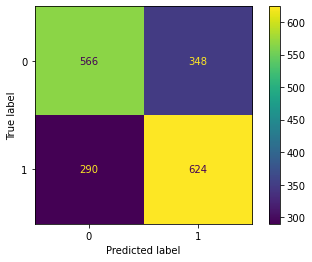

In [70]:
plot_confusion_matrix(model_lr, X_up_test, Y_up_test)  
plt.show()

In [71]:
### Matrice de confusion du modèle RF

print(classification_report(X_up_test_predict_2, Y_up_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_up_test_predict_2,Y_up_test,), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.75      0.99      0.85       691
       Fraud       0.99      0.80      0.89      1137

    accuracy                           0.87      1828
   macro avg       0.87      0.89      0.87      1828
weighted avg       0.90      0.87      0.87      1828



,Predicted Not Fraud,Predicted Fraud
Not Fraud,685,6
Fraud,229,908


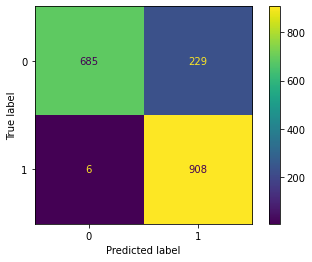

In [72]:
plot_confusion_matrix(model_rf, X_up_test, Y_up_test)  
plt.show()

In [73]:
### Matrice de confusion du modèle XGB

print(classification_report(X_up_test_predict_3,Y_up_test, target_names = ['Not Fraud', 'Fraud']))
display(pd.DataFrame(confusion_matrix(X_up_test_predict_3, Y_up_test), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      1.00      0.95       832
       Fraud       1.00      0.92      0.95       996

    accuracy                           0.95      1828
   macro avg       0.95      0.96      0.95      1828
weighted avg       0.96      0.95      0.95      1828



,Predicted Not Fraud,Predicted Fraud
Not Fraud,830,2
Fraud,84,912


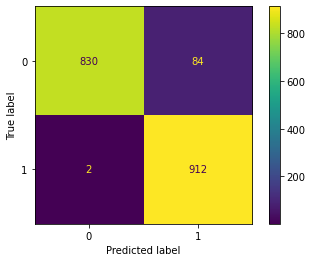

In [74]:
plot_confusion_matrix(model_xgb, X_up_test, Y_up_test)  
plt.show()

Il ressort de ces résultats que le modèle XGB est le meilleur modèle étant donnée qu'il a une grande précision sur les données de test avec un score de 95.29% et un score de 97.62% sur l'ensemble des données.
On peut également recourir à d'autres indicteurs de mesure de performances comme par exemple le MAE (Mean Absolute Error) pour évaluer la performance de nos trois modèles

In [75]:
print("LR MAE: ",mean_absolute_error(Y_up, prediction_lr)*100)
print("RF MAE: ",mean_absolute_error(Y_up, prediction_rf)*100)
print("XGB MAE: ",mean_absolute_error(Y_up, prediction_xgb)*100)

LR MAE:  33.39023109243697
RF MAE:  11.72531512605042
XGB MAE:  2.3765756302521006


### Conclusion

On essaie de faire des prédictions en utilisant à la fois un ensemble de données déséquilibré et un ensemble de données équilibré, en utilisant les algorithmes suvants : Régression logistique, Random Forest et XGB.

J'ai procédé à l'ajustement des hyperparamètres afin de trouver les meilleurs résultats possibles avec chaque algorithme sur les deux ensembles de données.

Il en ressort que XGB a les meilleures performances dans les deux cas, mais les résultats obtenus avec l'ensemble des données équilibré sont meilleurs avec une précision de 0,987 contre 0,97 avec l'ensemble de données déséquilibré